In [2]:
# Run this in Google Colab
!pip install --quiet pandas-datareader seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import wb

# 1) Fetch annual inflation (consumer prices, annual %) for India from World Bank
# Indicator code: FP.CPI.TOTL.ZG
start_year = 1990
end_year = 2024

try:
    df = wb.download(indicator='FP.CPI.TOTL.ZG', country='IN', start=start_year, end=end_year)
    df = df.reset_index().rename(columns={'year':'Year','FP.CPI.TOTL.ZG':'Inflation'})
except Exception as e:
    raise RuntimeError("Failed to download from World Bank. You can upload a CSV instead. Error: " + str(e))

# show fetched rows
print(df.tail())

# 2) Prepare a matrix for the heatmap: rows = decade (e.g., 1990s, 2000s...), columns = year-in-decade (0..9)
df = df.dropna(subset=['Inflation'])

# Convert 'Year' column to numeric, coercing errors to NaN, then drop NaN rows
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int) # Convert to integer after dropping NaNs

df['Decade'] = (df['Year'] // 10) * 10
df['YearInDecade'] = df['Year'] % 10

# Create pivot table: index=Decade, columns=YearInDecade
pivot = df.pivot(index='Decade', columns='YearInDecade', values='Inflation')

# Sort index and columns
pivot = pivot.sort_index(ascending=True)
pivot = pivot.reindex(columns=sorted(pivot.columns))

# 3) Plot heatmap
plt.figure(figsize=(12, 4 + pivot.shape[0]*0.7))
sns.heatmap(pivot, annot=True, fmt=".1f", linewidths=.5, cbar_kws={'label':'Inflation (annual %)'})
plt.title(f'India — Annual Inflation (consumer prices, %) by Decade ({start_year}–{end_year})')
plt.xlabel('Year within decade')
plt.ylabel('Decade')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4) Save to file (optional)
plt.savefig('india_inflation_heatmap.png', dpi=300, bbox_inches='tight')
print("Saved india_inflation_heatmap.png")

   country  Year  Inflation
30   India  1994  10.247936
31   India  1993   6.326890
32   India  1992  11.787817
33   India  1991  13.870246
34   India  1990   8.971233


/tmp/ipython-input-2839818677.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator='FP.CPI.TOTL.ZG', country='IN', start=start_year, end=end_year)


TypeError: unsupported operand type(s) for //: 'str' and 'int'

/tmp/ipython-input-3523236854.py:16: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator='FP.CPI.TOTL.ZG', country='IN', start=start_year, end=end_year)


   country  Year  Inflation
30   India  1994  10.247936
31   India  1993   6.326890
32   India  1992  11.787817
33   India  1991  13.870246
34   India  1990   8.971233


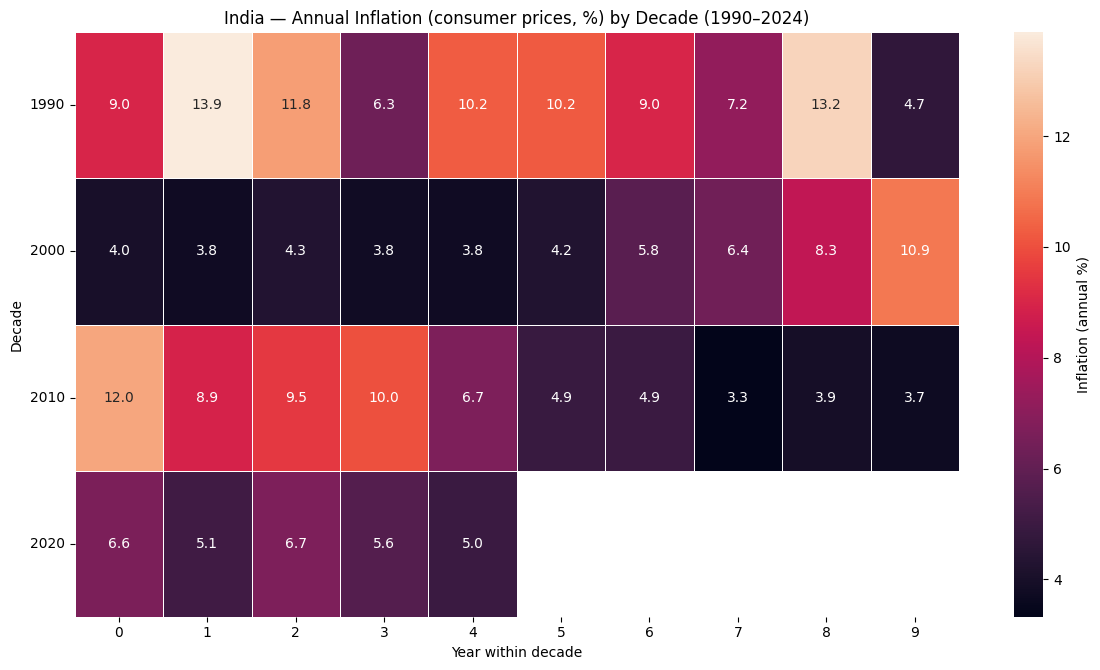

Saved india_inflation_heatmap.png


<Figure size 640x480 with 0 Axes>

In [4]:
# Run this in Google Colab
!pip install --quiet pandas-datareader seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import wb

# 1) Fetch annual inflation (consumer prices, annual %) for India from World Bank
# Indicator code: FP.CPI.TOTL.ZG
start_year = 1990
end_year = 2024

try:
    df = wb.download(indicator='FP.CPI.TOTL.ZG', country='IN', start=start_year, end=end_year)
    df = df.reset_index().rename(columns={'year':'Year','FP.CPI.TOTL.ZG':'Inflation'})
except Exception as e:
    raise RuntimeError("Failed to download from World Bank. You can upload a CSV instead. Error: " + str(e))

# show fetched rows
print(df.tail())

# 2) Prepare a matrix for the heatmap: rows = decade (e.g., 1990s, 2000s...), columns = year-in-decade (0..9)
df = df.dropna(subset=['Inflation'])

# Convert 'Year' column to numeric, coercing errors to NaN, then drop NaN rows
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int) # Convert to integer after dropping NaNs

df['Decade'] = (df['Year'] // 10) * 10
df['YearInDecade'] = df['Year'] % 10

# Create pivot table: index=Decade, columns=YearInDecade
pivot = df.pivot(index='Decade', columns='YearInDecade', values='Inflation')

# Sort index and columns
pivot = pivot.sort_index(ascending=True)
pivot = pivot.reindex(columns=sorted(pivot.columns))

# 3) Plot heatmap
plt.figure(figsize=(12, 4 + pivot.shape[0]*0.7))
sns.heatmap(pivot, annot=True, fmt=".1f", linewidths=.5, cbar_kws={'label':'Inflation (annual %)'})
plt.title(f'India — Annual Inflation (consumer prices, %) by Decade ({start_year}–{end_year})')
plt.xlabel('Year within decade')
plt.ylabel('Decade')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4) Save to file (optional)
plt.savefig('india_inflation_heatmap.png', dpi=300, bbox_inches='tight')
print("Saved india_inflation_heatmap.png")